In [62]:
#Import dependancies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
%matplotlib inline

csv_path = "aqi v2 data.csv"
aqi_ca20 = pd.read_csv(csv_path)
aqi_ca20

,Date,2020 AQI Value,Main Pollutant,Site Name,Site ID,Source,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019),New Date
0,1/1/2020,102,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AirNow,180,52,145,1-Jan
1,1/2/2020,66,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AirNow,155,37,93,2-Jan
2,1/3/2020,87,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AirNow,110,24,100,3-Jan
3,1/4/2020,99,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AirNow,118,47,85,4-Jan
4,1/5/2020,96,PM2.5,Long Beach-Route 710 Near Road,06-037-4008,AirNow,102,39,57,5-Jan
...,...,...,...,...,...,...,...,...,...,...
110,4/20/2020,43,Ozone,Pasadena,06-037-2005,AirNow,119,42,67,20-Apr
111,4/21/2020,48,PM2.5,Glendora,06-037-0016,AirNow,179,43,87,21-Apr
112,4/22/2020,101,Ozone,Glendora,06-037-0016,AirNow,161,43,61,22-Apr
113,4/23/2020,140,Ozone,Glendora,06-037-0016,AirNow,122,45,69,NaN


In [63]:
#Reviewing column names
aqi_ca20.columns

Index(['Date', '2020 AQI Value', 'Main Pollutant', 'Site Name', 'Site ID',
       'Source', '20-year High (1980-2019)', '20-year Low (1980-2019)',
       '5-year Median (2015-2019)', 'New Date'],
      dtype='object')

In [64]:
#Dropping columns that are not needed
aqi_ca20 = aqi_ca20.drop(['Site ID','Source'],axis=1)

In [65]:
#Reviewing datatypes for yearly values
aqi_ca20.dtypes

Date                         object
2020 AQI Value                int64
Main Pollutant               object
Site Name                    object
20-year High (1980-2019)      int64
20-year Low (1980-2019)       int64
5-year Median (2015-2019)    object
New Date                     object
dtype: object

In [66]:
#Changing 5-year Median datatype to integer. Received error. 
aqi_ca20 = aqi_ca20[('5-year Median (2015-2019)')].astype(int)

ValueError: invalid literal for int() with base 10: '.'

In [67]:
#After requesting assistance, was guided in utilizing the below try/except to locate the culprit: "."
for item in list(aqi_ca20['5-year Median (2015-2019)']):
    try:
        int(item)
    except:
        print(f"Could not converted to int. Here is the number{item}")

Could not converted to int. Here is the number.


In [68]:
#Obliterate that pesky outlier.
aqi_ca20.loc[aqi_ca20['5-year Median (2015-2019)'] == ".",:]
tmp = aqi_ca20.drop(index=59)

In [69]:
#Confirm obliteration.
tmp.loc[tmp['5-year Median (2015-2019)'] == ".",:]

,Date,2020 AQI Value,Main Pollutant,Site Name,20-year High (1980-2019),20-year Low (1980-2019),5-year Median (2015-2019),New Date


In [70]:
#Resume my previous quest to change the datatype. Success. 
aqi_ca20[('5-year Median (2015-2019)')] = tmp[('5-year Median (2015-2019)')].astype(int)
aqi_ca20.dtypes

Date                          object
2020 AQI Value                 int64
Main Pollutant                object
Site Name                     object
20-year High (1980-2019)       int64
20-year Low (1980-2019)        int64
5-year Median (2015-2019)    float64
New Date                      object
dtype: object

In [47]:
#Create groupbys to utilize in dataframe. 
main_pollutant_groupy = aqi_ca20.groupby(["Main Pollutant"])

total_pollutant = main_pollutant_groupy["Main Pollutant"].count()
avg_pollutant = main_pollutant_groupy["2020 AQI Value"].mean()
avg_pollutant = avg_pollutant.round(2)
highest_in_20Y = main_pollutant_groupy["20-year High (1980-2019)"].max()
lowest_in_20Y = main_pollutant_groupy["20-year Low (1980-2019)"].min()

highest_in_5Y = main_pollutant_groupy['5-year Median (2015-2019)'].max()
lowest_in_5Y = main_pollutant_groupy['5-year Median (2015-2019)'].min()

#Creating DataFrame
pollutants = pd.DataFrame({
                                "Pollutant Totals in 2020": total_pollutant,
                                "Average in 2020": avg_pollutant,
                                "Highest in 20 Years": highest_in_20Y,
                                "Lowest in 20 Years": lowest_in_20Y,
                                "Highest in 5 Years": highest_in_5Y,
                                "Lowest in 5 Years": lowest_in_5Y})
pollutants

,Pollutant Totals in 2020,Average in 2020,Highest in 20 Years,Lowest in 20 Years,Highest in 5 Years,Lowest in 5 Years
Main Pollutant,,,,,,
Ozone,54,51.57,190,31,100.0,48.0
PM2.5,61,65.39,180,19,145.0,45.0


In [49]:
#Print statements

print(f"The total pollution/day caused by Ozone in 2020 is {pollutants.iat[0,0]}")
print(f"The total pollution/day caused by PM2.5 in 2020 is {pollutants.iat[1,0]}")
print(f"---------------------------------------------------------------")
print(f"The average pollution caused by Ozone in 2020 is {pollutants.iat[0,1]}")
print(f"The average pollution caused by PM2.5 in 2020 is {pollutants.iat[1,1]}")
print(f"---------------------------------------------------------------")
print(f"The highest pollution caused by Ozone in the last 20 years is {pollutants.iat[0,2]}")
print(f"The highest pollution caused by PM2.5 in the last 20 years is {pollutants.iat[1,2]}")
print(f"---------------------------------------------------------------")
print(f"The lowest pollution caused by Ozone in the last 20 years is {pollutants.iat[0,3]}")
print(f"The lowest pollution caused by PM2.5 in the last 20 years is {pollutants.iat[1,3]}")
print(f"---------------------------------------------------------------")
print(f"The highest pollution caused by Ozone in the last 5 years is {pollutants.iat[0,4]}")
print(f"The highest pollution caused by PM2.5 in the last 5 years is {pollutants.iat[1,4]}")
print(f"---------------------------------------------------------------")
print(f"The lowest pollution caused by Ozone in the last 5 years is {pollutants.iat[0,5]}")
print(f"The lowest pollution caused by PM2.5 in the last 5 years is {pollutants.iat[1,5]}")

The total pollution/day caused by Ozone in 2020 is 54
The total pollution/day caused by PM2.5 in 2020 is 61
---------------------------------------------------------------
The average pollution caused by Ozone in 2020 is 51.57
The average pollution caused by PM2.5 in 2020 is 65.39
---------------------------------------------------------------
The highest pollution caused by Ozone in the last 20 years is 190
The highest pollution caused by PM2.5 in the last 20 years is 180
---------------------------------------------------------------
The lowest pollution caused by Ozone in the last 20 years is 31
The lowest pollution caused by PM2.5 in the last 20 years is 19
---------------------------------------------------------------
The highest pollution caused by Ozone in the last 5 years is 100.0
The highest pollution caused by PM2.5 in the last 5 years is 145.0
---------------------------------------------------------------
The lowest pollution caused by Ozone in the last 5 years is 48.0
The

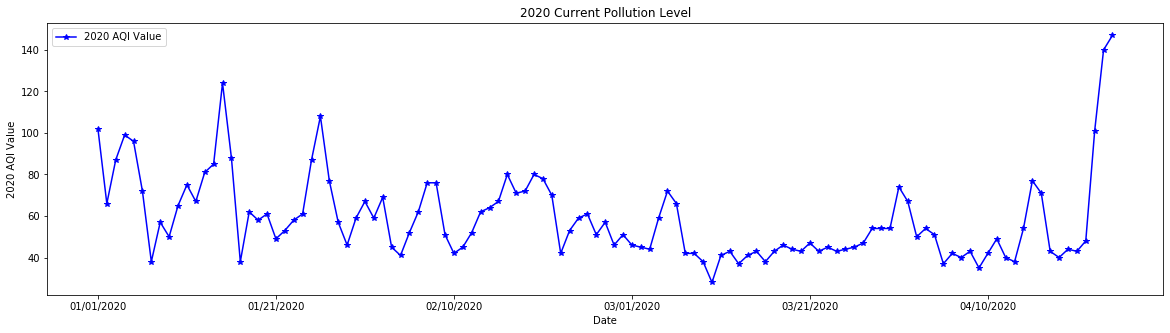

In [50]:
#2020 Current Pollutation Level Line Plot
aqi_ca20.plot(kind= "line", x='Date', y='2020 AQI Value', marker = "*", color = "blue", \
                figsize=(20,5), title= "2020 Current Pollution Level")
plt.ylabel("2020 AQI Value")
plt.show()

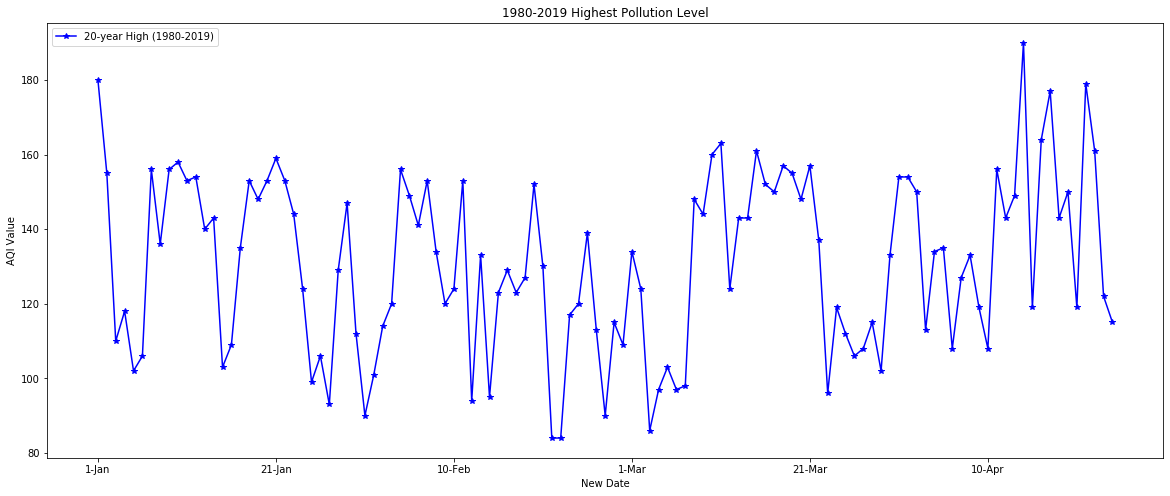

In [57]:
#1980-2019 Highest Pollution Level Line Plot
aqi_ca20.plot(kind= "line",x= 'New Date', y='20-year High (1980-2019)', marker = "*", color = "blue", \
                figsize=(20,8),use_index=True, title= "1980-2019 Highest Pollution Level")
plt.ylabel("AQI Value")
plt.show()

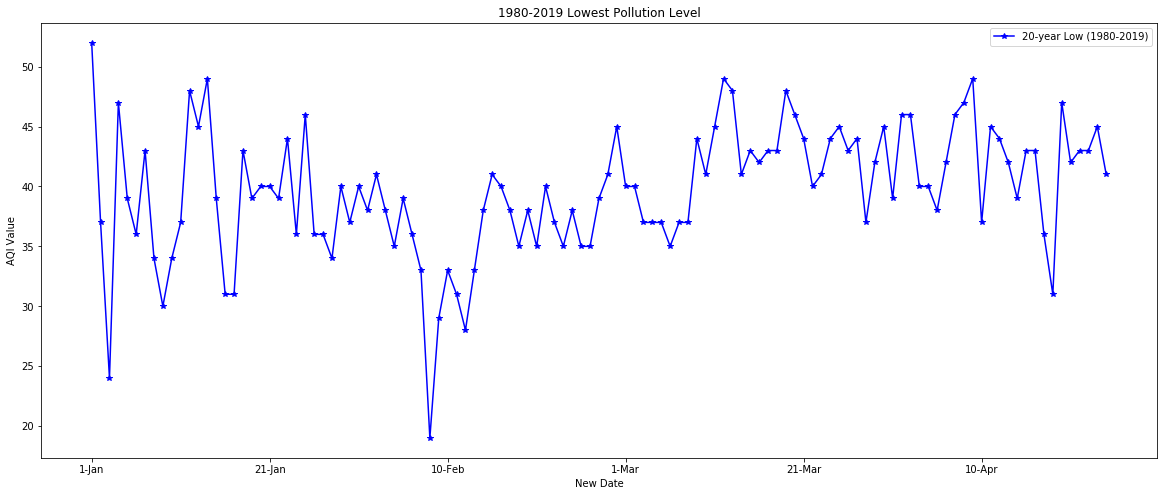

In [59]:
#1980-2019 Lowest Pollution Level Line Plot
aqi_ca20.plot(kind= "line", x='New Date', y='20-year Low (1980-2019)', marker = "*", color = "blue", \
                figsize=(20,8), title= "1980-2019 Lowest Pollution Level")
plt.ylabel("AQI Value")
plt.show()

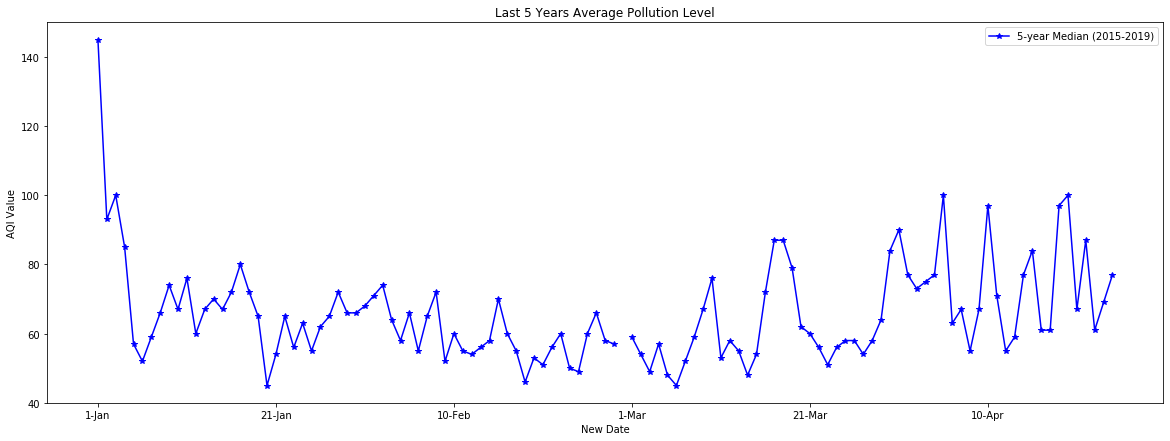

In [71]:
#Last Five Years Average Pollution Level
aqi_ca20.plot(kind= "line", x='New Date', y='5-year Median (2015-2019)',marker = "*", color = "blue", \
                figsize=(20,7), title= "Last 5 Years Average Pollution Level")
plt.ylabel("AQI Value")
plt.show()